# Accessing, Managing Groups

In [1]:


# Import
from arcgis.gis import GIS
# logins:
apl = GIS(url="https://python.playground.esri.com/portal",username='arcgis_python', password='amazing_arcgis_123', profile='python_playground_prof')
aol = GIS(url="https://arcgis.com/", username='arcgis_python', password="P@ssword123",)
apa =GIS("https://python.playground.esri.com/portal")
aoa =GIS()


In [11]:
urban_groups = aoa.groups.search('title:Urban', max_groups=15)
urban_groups

[<Group title:"ArcGIS Urban Hub Share" owner:Urban_Admin>,
 <Group title:"ArcGIS Urban Open Data" owner:Urban_Admin>,
 <Group title:"ArcGIS Urban Paris" owner:Urban_Admin>,
 <Group title:"BSU GIS Students Urban Planning Plan 412" owner:magyar123>,
 <Group title:"Center on Urban Poverty and Community Development" owner:neocando_CWRU>,
 <Group title:"Chicago Urban Planners" owner:vziols2>,
 <Group title:"City of Toronto Urban Forestry" owner:jmcmeek>,
 <Group title:"Claremont Urban Tree Initiative" owner:claremontcolleges>,
 <Group title:"CP255 Urban Applications of Geographic Information Systems" owner:CP255_Instructor>,
 <Group title:"CRP 3851/5851 Special Topics in Urban Design: Sustainable Adaptation of Large Modern Footprints (Fall 2014)" owner:bnb29_CUGIS>,
 <Group title:"CURSO_ARC_URBAN" owner:JulianaOnzi>,
 <Group title:"D.C. urban agriculture" owner:amandahuron>,
 <Group title:"Data Sharing - Common Ground Urban Design & Planning" owner:kevin.cross>,
 <Group title:"DC Urban Fore

In [12]:
urban_groups[5]


<Group title:"Chicago Urban Planners" owner:vziols2>

In [15]:
esri_owned_groups = aoa.groups.search(query='access:public and description:basemaps', max_groups=15)
esri_owned_groups

[<Group title:"**LIVE** Essentials Basemaps" owner:sch7712>,
 <Group title:"**LIVE** SARA Basemaps" owner:sch7712>,
 <Group title:"2016 Byrne Seminar Series Raritan River" owner:mmazureknj>,
 <Group title:"A-16 Content" owner:Federal_User_Community>,
 <Group title:"Active Surface Faults in Houston, TX, USA" owner:kcking99>,
 <Group title:"Additional basemaps" owner:moh_Ramboll>,
 <Group title:"Administration - Basemaps" owner:GIS_StAlbert>,
 <Group title:"Afghanistan Foundation" owner:Intel_AFMIE>,
 <Group title:"Alachua Basemaps" owner:ACPAFL>,
 <Group title:"Andean Alliance for Sustainable Development GIS" owner:AASD>,
 <Group title:"Antarctic Maps" owner:esri>,
 <Group title:"Apps and Resources" owner:heidi.uow>,
 <Group title:"ArcGIS 3D Base Scene Review Group" owner:3DCitiesAdmin>,
 <Group title:"ArcGIS Explorer Desktop Basemaps and Layers" owner:esri_arcgisexplorer>,
 <Group title:"ArcGIS for Local Government TryItLive Basemaps" owner:ArcGISforLocalGovTryIt>]

In [17]:
basemaps = esri_owned_groups[0]
basemaps.access
basemaps

'public'

<Group title:"**LIVE** Essentials Basemaps" owner:sch7712>

In [21]:
# Get more property
import time
print(basemaps.groupid, basemaps.isFav, basemaps.isInvitationOnly)
print(basemaps.owner)
time.localtime(basemaps.created/1000)

1ed4454260634b06a0524c7998f87989 False False
sch7712


time.struct_time(tm_year=2017, tm_mon=4, tm_mday=3, tm_hour=15, tm_min=27, tm_sec=16, tm_wday=0, tm_yday=93, tm_isdst=1)

In [25]:
#after you find the group id , you can get the item
aoa.groups.get('1ed4454260634b06a0524c7998f87989' )


<Group title:"**LIVE** Essentials Basemaps" owner:sch7712>

## creating new groups


In [43]:
# connect to GIS with credentials
geocaching_group.delete()
geocaching_group = apl.groups.create(title='Recreational geocaching',
                                    tags = 'hobby, geocaching, gps, hide n seek',
                                    description = 'Group to share your landmarks and games',
                                    snippet = 'Share your GPX tracks as feature layers here',
                                    access = 'org',
                                    is_invitation_only = 'False',
                                    thumbnail = r'C:\Users\jeng430\Pictures\gis.jpg')



True

<Group title:"Recreational geocaching" owner:arcgis_python>
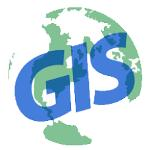

In [44]:
geocaching_group



Sharing content to groups

In [54]:
#search a private content
result=apl.content.search("access:private")
result
#check access property
result[0].access


[<Item title:"Imagery with Labels" type:Web Map owner:arcgis_python>,
 <Item title:"Physical With Labels" type:Web Map owner:arcgis_python>,
 <Item title:"World Hillshade" type:Web Map owner:arcgis_python>,
 <Item title:"Ocean Basemap" type:Web Map owner:arcgis_python>,
 <Item title:"DeLorme World Basemap" type:Web Map owner:arcgis_python>,
 <Item title:"earthquakes_2" type:Service Definition owner:arcgis_python>,
 <Item title:"MapWorld Global Basemap" type:Web Map owner:arcgis_python>,
 <Item title:"Ebola_Treatment_Units" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"SanDiego_PlacesToRun" type:Imagery Layer owner:arcgis_python>,
 <Item title:"Redlands vegetation growth" type:Imagery Layer owner:arcgis_python>]

'private'

In [55]:
#share content to a group
result[0].share(groups=geocaching_group.id)
result[1].share(groups=geocaching_group.id)
result[2].share(groups=geocaching_group.id)

{'notSharedWith': [], 'itemId': '81ecd3cf37a94f4fb343de98a3195b21'}

{'notSharedWith': [], 'itemId': '2641f35af5df434a8340f724b9d2315f'}

{'notSharedWith': [], 'itemId': 'f1462303fe014afe8f5424951fe40937'}

In [56]:
#Listing contents of the group
geocaching_group.content()

[<Item title:"Imagery with Labels" type:Web Map owner:arcgis_python>,
 <Item title:"Locations of power pedestals collected in 2012" type:Feature Layer Collection owner:arcgis_python>,
 <Item title:"Physical With Labels" type:Web Map owner:arcgis_python>,
 <Item title:"World Hillshade" type:Web Map owner:arcgis_python>]

## Adding removing users to the group

In [57]:
# let us add publisher1 and publisher2 to this group
geocaching_group.add_users(['publisher1', 'publisher2', 'demo_user1'])

{'notAdded': ['publisher2', 'publisher1', 'demo_user1']}

In [58]:
# remove the demo_user1 account wrongly added to this group
geocaching_group.remove_users(['demo_user1'])

{'notRemoved': ['demo_user1']}

In [59]:
# can you remove the owner of the group?
geocaching_group.remove_users(['arcgis_python_api'])

{'notRemoved': ['arcgis_python_api']}

## Listing users belonging to a group¶


In [60]:
geocaching_group.get_members()


{'owner': 'arcgis_python', 'admins': ['arcgis_python'], 'users': []}